### Find tolerance parameter

Step 10, dt=2.56e-05, Error Estimate=3.333333333333333e-22
Step 20, dt=0.0262144, Error Estimate=5.78141719324102e-13
Step 30, dt=0.04287727662298124, Error Estimate=4.180628520254776e-09
Step 40, dt=0.011501474249141663, Error Estimate=1.121379110738648e-09
Step 50, dt=0.003345352458992086, Error Estimate=3.2724062440595295e-10
Step 60, dt=0.001067942632376079, Error Estimate=1.0481268183863187e-10
Step 70, dt=0.00037187526894870676, Error Estimate=3.6599954306727264e-11
Step 80, dt=0.00013987874594487853, Error Estimate=1.379829791461134e-11
Step 90, dt=5.629837925989276e-05, Error Estimate=5.563809832353518e-12
Step 100, dt=2.404496903520068e-05, Error Estimate=2.3798791761801384e-12
Step 110, dt=1.0821103999928912e-05, Error Estimate=1.0723601782390099e-12
Step 120, dt=5.100947038782391e-06, Error Estimate=5.060197075757827e-13
Step 130, dt=2.505965444192887e-06, Error Estimate=2.4880971286172477e-13
Step 140, dt=1.2775759865554694e-06, Error Estimate=1.269396037692241e-13
Step 150

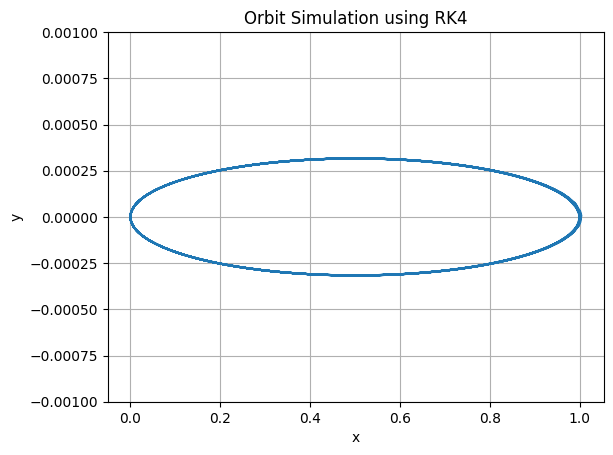

[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 4.47213595e-11 0.00000000e+00]
 [1.00000000e+00 1.34164079e-10 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]


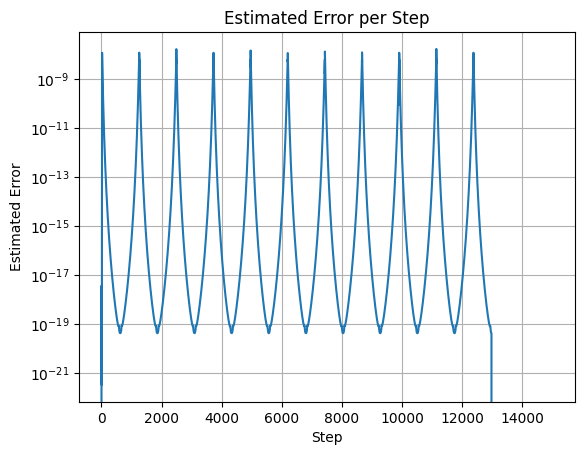

0.0


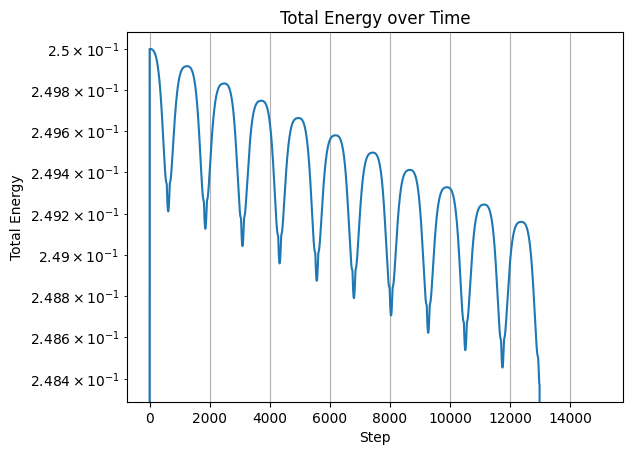

In [2]:
import numpy as np
import matplotlib.pyplot as plt
v_0 = np.sqrt(5) * 1e-4

def acceleration(r,):
    norm = np.linalg.norm(r)
    if norm < 1e-10:  # Add a small threshold to prevent division by zero
        return np.zeros_like(r)
    return -1/norm**3 * np.array(r) / 4
def vel_dispersion(v, A=1, B=1):
    return -A/(np.linalg.norm(v)**3 + B) * np.array(v)

def rk4_step(r, v, dt, alpha_dispersion=0, A=1, B=1):
    k1_v = acceleration(r) + alpha_dispersion * vel_dispersion(v, A, B)
    k1_r = v

    k2_v = acceleration(r + 0.5 * dt * k1_r) + alpha_dispersion * vel_dispersion(v + 0.5 * dt * k1_v, A, B)
    k2_r = v + 0.5 * dt * k1_v

    k3_v = acceleration(r + 0.5 * dt * k2_r) + alpha_dispersion * vel_dispersion(v + 0.5 * dt * k2_v, A, B)
    k3_r = v + 0.5 * dt * k2_v

    k4_v = acceleration(r + dt * k3_r) + alpha_dispersion * vel_dispersion(v + dt * k3_v, A, B)
    k4_r = v + dt * k3_v

    r_next = r + (dt / 6) * (k1_r + 2 * k2_r + 2 * k3_r + k4_r)
    v_next = v + (dt / 6) * (k1_v + 2 * k2_v + 2 * k3_v + k4_v)

    return r_next, v_next
def simulate_orbit(r0, v0, dt, tf, tol=1e-7, alpha_dispersion=0, A=1, B=1):
    num_steps = int(tf / dt)
    r = np.zeros((num_steps//2, 3))
    v = np.zeros((num_steps//2, 3))
    err = np.zeros(num_steps//2)
    energy = np.zeros(num_steps//2)
    r[0] = r0
    v[0] = v0
    t = 0
    i = 1
    while i < num_steps//2:
        r1, v1 = rk4_step(r[i-1], v[i-1], dt, alpha_dispersion, A=A, B=B)
        r1, v1 = rk4_step(r1, v1, dt, alpha_dispersion, A=A, B=B)
        r2, v2 = rk4_step(r[i-1], v[i-1], 2*dt, alpha_dispersion, A=A, B=B)
        norm = np.linalg.norm(r2-r1)
        if norm < 1e-20:  # Add a small threshold to prevent division by zero
            norm = 1e-20
        rho = 30 * dt * tol / norm
        if rho >= 1:
            r[i] = r1
            v[i] = v1
            t += 2  * dt
            err[i] = norm/30
            energy[i] = 0.5 * np.linalg.norm(v[i])**2 - 1/(4 * np.linalg.norm(r[i]))
            i += 1
            if i % 10 == 0:
                print(f"Step {i}, dt={dt}, Error Estimate={err[i-1]}")

        dt = min(dt * rho**(1/4), 2 * dt)
        if np.linalg.norm(r1) <  1e-7:
            break
    return r, v, err, energy, t

r, v, err, energy, dt = simulate_orbit(np.array([1, 0, 0]), np.array([0, v_0, 0]), 1e-7, 3e-3, alpha_dispersion=0)
print("Timme too  schwarrz:", dt)
plt.plot(r[:, 0], r[:, 1])
plt.ylim(-1e-3, 1e-3)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbit Simulation using RK4')
# plt.axis('equal')
plt.grid()
plt.show()
print(r)


plt.plot(err)
plt.yscale('log')   
plt.xlabel('Step')
plt.ylabel('Estimated Error')
plt.title('Estimated Error per Step')
plt.grid()
plt.show()

print(min([np.linalg.norm(r[i,:]) for i in range(r.shape[0])]))

plt.plot(abs(energy))
plt.yscale('log')
plt.xlabel('Step')
plt.ylabel('Total Energy')
plt.title('Total Energy over Time')
plt.grid()
plt.show()

### Plot orbit to schwarzchild radius using velocity dispersion

Step 10, dt=2.56e-05, Error Estimate=3.333333333333333e-22
Step 20, dt=0.0262144, Error Estimate=3.4049471723690824e-11
Step 30, dt=0.076619119751787, Error Estimate=6.831175865252232e-09
Step 40, dt=0.07440159917595486, Error Estimate=7.291022052617207e-09
Step 50, dt=0.021988506358007236, Error Estimate=2.156483384568872e-09
Step 60, dt=0.006685042802631813, Error Estimate=6.546606774139686e-10
Step 70, dt=0.0020957749521795677, Error Estimate=2.0550957108348255e-10
Step 80, dt=0.0007038282780120874, Error Estimate=6.919120187998601e-11
Step 90, dt=0.0002550713966703194, Error Estimate=2.5135072549145423e-11
Step 100, dt=9.930752102910825e-05, Error Estimate=9.806022260107899e-12
Step 110, dt=4.1281061405857355e-05, Error Estimate=4.0833664393900986e-12
Step 120, dt=1.822154612717992e-05, Error Estimate=1.8050943821243437e-12
Step 130, dt=8.506170426357601e-06, Error Estimate=8.43751788904583e-13
Step 140, dt=4.1905456384262944e-06, Error Estimate=4.1616245001444215e-13
Step 150, dt=

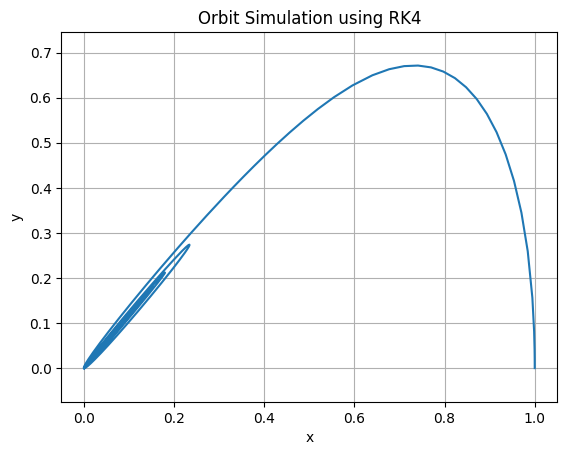

[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.59999989e-07 0.00000000e+00]
 [1.00000000e+00 4.79999905e-07 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]


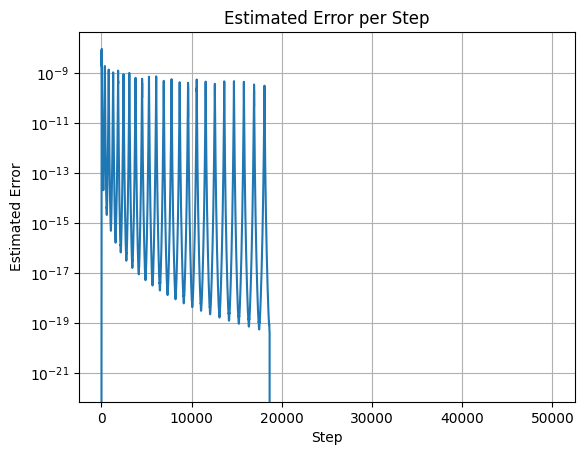

0.0


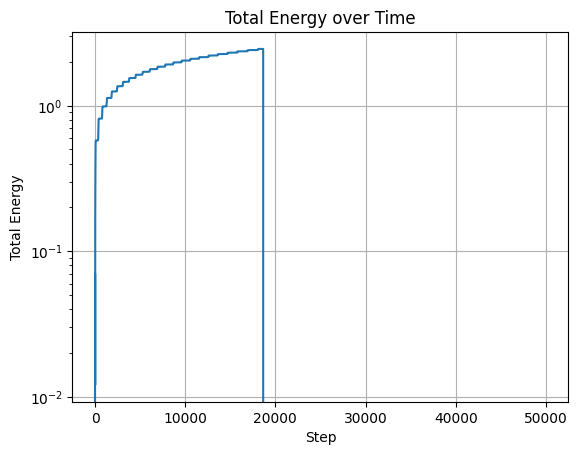

In [3]:
v_0 = .8
r, v, err, energy,  t = simulate_orbit(np.array([1, 0, 0]), np.array([0, v_0, 0]), 1e-7, 1e-2, alpha_dispersion=1, A=1, B=1)
print("time  too  schwarz", t)
plt.plot(r[:, 0], r[:, 1])
# plt.ylim(-1e-3, 1e-3)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbit Simulation using RK4')
plt.axis('equal')
plt.grid()
plt.show()

print(r)


plt.plot(err)
plt.yscale('log')   
plt.xlabel('Step')
plt.ylabel('Estimated Error')
plt.title('Estimated Error per Step')
plt.grid()
plt.show()

print(min([np.linalg.norm(r[i,:]) for i in range(r.shape[0])]))

plt.plot(abs(energy))
plt.yscale('log')
plt.xlabel('Step')
plt.ylabel('Total Energy')
plt.title('Total Energy over Time')
plt.grid()
plt.show()

### Get lenth of time to the schwarzchild radius

### Sweep orbit times over A, B $\epsilon$ [.5,10]

Starting parameter sweep...
1.0, 0.5 is 4.794756624178389
0.5, 0.5 is 11.80627559352962
1.0, 1.0 is 11.05931405643713
0.5, 1.0 is 24.019377194626685
1.0, 1.5 is 17.194769847267057
1.0, 2.5 is 28.6613664730069
1.0, 2.0 is 23.026034779720963
0.5, 1.5 is 35.452205281272576
0.5, 2.5 is 56.89770335773032
1.0, 3.0 is 34.19418796735639
0.5, 2.0 is 46.349258696046675
1.0, 4.5 is 50.125836970611175
1.0, 3.5 is 39.58039753599726
0.5, 3.0 is 67.16746195829403
1.0, 5.0 is 55.29112530675127
1.0, 4.0 is 44.88892584675048
1.5, 0.5 is 5.568801459309707
1.5, 1.0 is 6.641508234088479
1.5, 1.5 is 10.771124615310615
1.5, 2.0 is 14.790883375954397
0.5, 3.5 is 77.20787059383395
1.5, 2.5 is 18.695771622367054
1.5, 3.0 is 22.491091909678723
1.0, 5.5 is 60.38144782258323
1.5, 3.5 is 26.20626959451295
0.5, 4.0 is 87.0716427793308
1.5, 4.0 is 29.88569535231004
1.5, 4.5 is 33.521246487005875
2.0, 0.5 is 6.589473015008102
2.0, 1.0 is 4.659155457667662
2.0, 1.5 is 7.497624313508861
1.5, 6.5 is 47.58151490234297
2.0

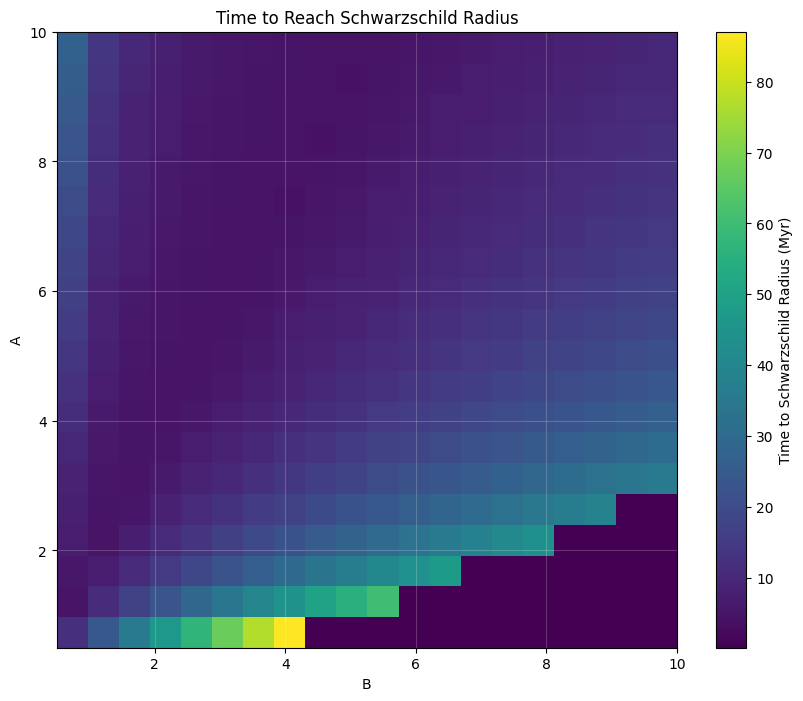

Minimum time: 0.10 Myr
Maximum time: 87.07 Myr
Mean time: 12.96 Myr


In [4]:
import concurrent.futures
import numba

# Progress bar helper: prefer notebook-friendly tqdm, fall back to console tqdm
try:
    from tqdm.notebook import tqdm
except Exception:
    try:
        from tqdm import tqdm
    except Exception:
        # Fallback no-op progress iterator
        def tqdm(it, total=None):
            for x in it:
                yield x


def time_to_schwarzschild(r0, v0, dt, tf, tol=1e-7, alpha_dispersion=0, A=1, B=1):
    num_steps = int(tf / dt)
    r = r0
    v = v0

    t = 0
    i = 0
    while i < num_steps//2:
        r1, v1 = rk4_step(r, v, dt, alpha_dispersion, A, B)
        r1, v1 = rk4_step(r1, v1, dt, alpha_dispersion, A, B)
        r2, v2 = rk4_step(r, v, 2*dt, alpha_dispersion, A, B)
        norm = np.linalg.norm(r2-r1)
        if norm < 1e-20:  # Add a small threshold to prevent division by zero
            norm = 1e-20
        rho = 30 * dt * tol / norm
        if rho >= 1:
            t += 2 * dt
            r = r1
            v = v1
            i += 1

        dt = min(dt * rho**(1/4), 2 * dt)

        if np.linalg.norm(r) < 1e-7:
            print(f'{A}, {B} is {t}')
            return t
        
    return tf  # Return maximum time if Schwarzschild radius not reached
        

def process_chunk_worker(chunk, r0, v0, dt, tf, tol, alpha_dispersion, A_values, B_values):
    """
    Worker that evaluates a chunk (list) of (i,j) pairs and returns a list of (i,j,t).
    Chunking reduces task overhead when individual evaluations are fast.
    """
    out = []
    for params in chunk:
        i, j = params
        out.append((i, j, time_to_schwarzschild(r0, v0, dt, tf, tol, alpha_dispersion, A_values[i], B_values[j])))
    return out


# small wrapper for multiprocessing.starmap/imap_unordered compatibility
def _worker_star(args):
    return process_chunk_worker(*args)


def A_B_sweep(r0, v0, dt, tf, tol=1e-7, alpha_dispersion=0, A_values=None, B_values=None, parallel=False, max_workers=None, backend='thread', chunk_size=8, show_progress=True):
    """Sweep over A_values and B_values and return a 2D results array.

    Backends supported:
      - 'thread' : ThreadPoolExecutor (default, notebook-friendly)
      - 'process': ProcessPoolExecutor (concurrent.futures)
      - 'multiprocessing': multiprocessing.Pool (user requested)

    Notes: On Windows / Jupyter, the 'multiprocessing' backend may still fail if the
    notebook environment cannot pickle cell-defined functions. For robust process
    parallelism on Windows prefer running as a standalone .py module.
    """
    # Convert A_values/B_values to numpy arrays if needed.
    if A_values is None:
        A_values = np.array([1.0])
    else:
        A_values = np.array(A_values)
    if B_values is None:
        B_values = np.array([1.0])
    else:
        B_values = np.array(B_values)

    results = np.zeros((len(A_values), len(B_values)))

    if not parallel:
        # Sequential fill (safe, simple)
        for i in range(len(A_values)):
            for j in range(len(B_values)):
                results[i, j] = time_to_schwarzschild(r0, v0, dt, tf, tol, alpha_dispersion, A_values[i], B_values[j])
        return results

    # Parallel path using chunking
    params = [(i, j) for i in range(len(A_values)) for j in range(len(B_values))]

    # Create chunks
    if chunk_size <= 1:
        chunks = [[p] for p in params]
    else:
        chunks = [params[k:k+chunk_size] for k in range(0, len(params), chunk_size)]

    from itertools import repeat

    # THREAD backend (fastest to get working inside notebooks)
    if backend == 'thread':
        Executor = concurrent.futures.ThreadPoolExecutor
        worker = process_chunk_worker
        with Executor(max_workers=max_workers) as exe:
            futures = [exe.submit(worker, chunk, r0, v0, dt, tf, tol, alpha_dispersion, A_values, B_values) for chunk in chunks]
            if show_progress:
                it = concurrent.futures.as_completed(futures)
                for future in tqdm(it, total=len(futures)):
                    chunk_out = future.result()
                    for (i, j, t) in chunk_out:
                        results[i, j] = t
            else:
                for future in concurrent.futures.as_completed(futures):
                    chunk_out = future.result()
                    for (i, j, t) in chunk_out:
                        results[i, j] = t
        return results

    # ProcessPoolExecutor backend
    if backend == 'process':
        Executor = concurrent.futures.ProcessPoolExecutor
        worker = _worker_star  # use star wrapper to pass starmap-like args
        args = [(chunk, r0, v0, dt, tf, tol, alpha_dispersion, A_values, B_values) for chunk in chunks]
        with Executor(max_workers=max_workers) as exe:
            futures = [exe.submit(_worker_star, a) for a in args]
            if show_progress:
                it = concurrent.futures.as_completed(futures)
                for future in tqdm(it, total=len(futures)):
                    chunk_out = future.result()
                    for (i, j, t) in chunk_out:
                        results[i, j] = t
            else:
                for future in concurrent.futures.as_completed(futures):
                    chunk_out = future.result()
                    for (i, j, t) in chunk_out:
                        results[i, j] = t
        return results

    # Multiprocessing.Pool backend (uses imap_unordered for progress)
    if backend == 'multiprocessing':
        import multiprocessing as mp
        args = [(chunk, r0, v0, dt, tf, tol, alpha_dispersion, A_values, B_values) for chunk in chunks]
        # Use imap_unordered to get results as finished and reduce memory pressure
        with mp.Pool(processes=max_workers) as pool:
            it = pool.imap_unordered(_worker_star, args)
            if show_progress:
                for chunk_out in tqdm(it, total=len(args)):
                    for (i, j, t) in chunk_out:
                        results[i, j] = t
                        print(f'Results ({i}, {j})={t}')
            else:
                for chunk_out in it:
                    for (i, j, t) in chunk_out:
                        results[i, j] = t
        return results

    raise ValueError(f"Unknown backend '{backend}'. Choose 'thread', 'process' or 'multiprocessing'.")


if __name__ == "__main__":
    # Generate 2D heatmap of time to schwarzschild vs A and B
    A_values = np.linspace(0.5, 10, 20)  # Increased resolution
    B_values = np.linspace(0.5, 10, 20)   # Adjusted range and increased resolution

    print("Starting parameter sweep...")
    # Example: use multiprocessing Pool (may need module/script on Windows)
    results = A_B_sweep(np.array([1, 0, 0]), np.array([0, v_0, 0]), 
                    dt=1e-7, tf=1e-1, alpha_dispersion=1, 
                    A_values=A_values, B_values=B_values, parallel=True, backend='thread', max_workers=8, show_progress=True, chunk_size=4)
    print(results)
    print("Parameter sweep complete!")

    # Create the heatmap with improved visualization
    plt.figure(figsize=(10, 8))
    plt.imshow(results, extent=(B_values[0], B_values[-1], 
                            A_values[0], A_values[-1]), 
            aspect='auto', origin='lower', cmap='viridis')
    plt.colorbar(label='Time to Schwarzschild Radius (Myr)')
    plt.xlabel('B')
    plt.ylabel('A')
    plt.title('Time to Reach Schwarzschild Radius')

    # Add grid lines
    plt.grid(True, which='both', color='white', linestyle='-', alpha=0.2)
    plt.show()

    # Print some statistics
    print(f"Minimum time: {np.min(results):.2f} Myr")
    print(f"Maximum time: {np.max(results):.2f} Myr")
    print(f"Mean time: {np.mean(results):.2f} Myr")

In [5]:
# Quick timing sweep (tiny grid) to compare chunk_size and max_workers
import time

print("Running micro-benchmark with 3x3 grid...")
A_micro = np.linspace(0.5, 10, 3)  # Tiny grid for quick timing
B_micro = np.linspace(0.5, 10, 3)
configs = [
    {'chunk_size':1, 'max_workers':4},    # baseline: no chunking, max threads
    {'chunk_size':3, 'max_workers':4},    # medium chunks
    {'chunk_size':9, 'max_workers':4},    # one chunk per worker
    {'chunk_size':3, 'max_workers':2},    # fewer workers
]

timings = []
print('Testing configs on 3x3 grid (9 tasks total)')
for cfg in configs:
    print(f"\nConfig: chunk_size={cfg['chunk_size']}, max_workers={cfg['max_workers']}")
    t0 = time.time()
    res = A_B_sweep(np.array([1,0,0]), np.array([0, v_0, 0]), dt=1e-7, tf=1e-3, alpha_dispersion=1,
                    A_values=A_micro, B_values=B_micro, parallel=True, 
                    max_workers=cfg['max_workers'], backend='thread', chunk_size=cfg['chunk_size'], show_progress=False)
    dt = time.time() - t0
    timings.append((cfg['chunk_size'], cfg['max_workers'], dt))
    print(f"Elapsed: {dt:.2f} s")

print('\nSummary (sorted by speed):')
for c,m,t in sorted(timings, key=lambda x: x[2]):
    print(f"chunk={c:2d}, workers={m:2d} -> {t:.2f} s")

Running micro-benchmark with 3x3 grid...
Testing configs on 3x3 grid (9 tasks total)

Config: chunk_size=1, max_workers=4
5.25, 0.5 is 14.572205605674684
10.0, 0.5 is 26.992951588214677
10.0, 5.25 is 4.497864242285481
Elapsed: 12.54 s

Config: chunk_size=3, max_workers=4
5.25, 0.5 is 14.572205605674684
10.0, 0.5 is 26.992951588214677
10.0, 5.25 is 4.497864242285481
Elapsed: 12.15 s

Config: chunk_size=9, max_workers=4
5.25, 0.5 is 14.572205605674684
10.0, 0.5 is 26.992951588214677
10.0, 5.25 is 4.497864242285481
Elapsed: 6.43 s

Config: chunk_size=3, max_workers=2
5.25, 0.5 is 14.572205605674684
10.0, 0.5 is 26.992951588214677
10.0, 5.25 is 4.497864242285481
Elapsed: 11.82 s

Summary (sorted by speed):
chunk= 9, workers= 4 -> 6.43 s
chunk= 3, workers= 2 -> 11.82 s
chunk= 3, workers= 4 -> 12.15 s
chunk= 1, workers= 4 -> 12.54 s
